# THE PREDICTRON: END-TO-END LEARNING AND PLANNING

* 싸이그래머/IAM : 파트 1 - 딥마인드 논문리뷰 [1]
* 김무성

# Contents
* ABSTRACT
* 1 INTRODUCTION
* 2 BACKGROUND
* 3 PREDICTRON ARCHITECTURE
* 4 PREDICTRON LEARNING UPDATES
    - 4.1 SUPERVISED (MONTE-CARLO) LEARNING WITH THE PREDICTRON
    - 4.2 CONSISTENCY (SEMI-SUPERVISED) LEARNING WITH THE PREDICTRON
* 5 EXPERIMENTS
    - 5.1 EXPLORING THE PREDICTRON ARCHITECTURE
    - 5.2 COMPARING THE PREDICTRON TO OTHER DEEP NETWORKS
    - 5.3 SEMI-SUPERVISED LEARNING BY CONSISTENCY
    - 5.4 ANALYSIS OF ADAPTIVE DEPTH
    - 5.5 VISUALIZING THE PREDICTIONS IN THE POOL DOMAIN
* 6 RELATED WORK
* 7 DISCUSSION

# ABSTRACT

* One of the key challenges of artificial intelligence is to <font color="red">learn models</font> that are effective <font color="red">in the context of planning</font>.
* In this document we introduce the <font color="red">predictron architecture</font>.
* The predictron consists of a <font color="red">fully abstract model</font>, 
    - represented by a <font color="red">Markov reward process</font>, 
        - that can be <font color="red">rolled forward multiple “imagined” planning steps</font>.
* Each forward pass of the predictron 
    - <font color="red">accumulates internal rewards and values</font> 
        - over multiple planning depths.
* The predictron is <font color="red">trained end-to-end</font> so as to make these accumulated values accurately <font color="red">approximate the true value function</font>.
* We applied the predictron to procedurally generated 
    - <font color="red">random mazes</font> and 
    - a simulator for <font color="red">the game of pool</font>.
* The predictron yielded significantly <font color="red">more accurate predictions than</font> <font color="blue">conventional deep neural network architectures</font>

#### 참고
* [3] Markov reward model - https://en.wikipedia.org/wiki/Markov_reward_model
* [4] Lecture 2: Markov Decision Processes - http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/MDP.pdf

# 1 INTRODUCTION

#### model-based RL
* The central idea of model-based reinforcement learning is to decompose the RL problem into two subproblems: 
    - learning a model of the environment, and then 
    - planning with this model. 
* The model 
    - is typically represented by a Markov reward process (MRP) or decision process (MDP). 
* The planning component 
    - uses this model 
        - to evaluate and select 
            - among possible strategies. 

#### Rrolling forward the model          
* planning
    - This is typically achieved by rolling forward the model 
        - to construct a value function that 
            - estimates cumulative reward. 

#### trained essentially independently
* In prior work, 
    - the model is trained essentially independently of 
        - its use within the planner. 
    - As a result, 
        - the model is not well-matched 
            - with the overall objective of the agent. 

#### VS. model-free
* Prior deep reinforcement learning methods have successfully constructed models that can unroll near pixel-perfect reconstructions but are <font color="red">yet to surpass state-of-the-art model-free methods</font> in challenging RL domains with raw inputs 

#### The Predictron
* In this paper we introduce a new architecture, which we call the predictron, that <font color="red">integrates learning and planning</font> <font color="blue">into one end-to-end training procedure</font>. 
* At every step, a model is applied to an internal state, to produce a next state, reward, discount, and value estimate. 
* This model is completely abstract and its <font color="red">only goal is to facilitate accurate value prediction</font>. 

# 2 BACKGROUND

<img src="figures/cap1.png" width=600 />

# 3 PREDICTRON ARCHITECTURE

<img src="figures/cap4.png" width=800 />

<img src="figures/cap2.png" width=600 />

<img src="figures/cap3.png" width=600 />

* Each $λ_k$ weight acts as a gate on the computation of the λ-preturn: 
    - a value of λk = 0 will truncate the λ-preturn at layer k, while a value of $λ_k$ = I will utilise deeper layers based on additional steps of the model m; 
    - the final weight is always $λ_K$ = 0. 
    - The individual $λ_k$ weights may depend on the corresponding abstract state $s_k$ and can differ per prediction. 
    - <font color="red">This enables the predictron to compute to an adaptive depth (Graves, 2016) depending on the internal state and learning dynamics of the network</font>.

# 4 PREDICTRON LEARNING UPDATES
* 4.1 SUPERVISED (MONTE-CARLO) LEARNING WITH THE PREDICTRON
* 4.2 CONSISTENCY (SEMI-SUPERVISED) LEARNING WITH THE PREDICTRON

## 4.1 SUPERVISED (MONTE-CARLO) LEARNING WITH THE PREDICTRON

We can update all the k-step preturns $g^0$, . . . , $g^K$ towards a target outcome g, such as the Monte Carlo return from the outcomes of episodes in the environment, by minimising a mean-squared error loss,

<img src="figures/cap5.png" width=700 />

## 4.2 CONSISTENCY (SEMI-SUPERVISED) LEARNING WITH THE PREDICTRON

* Ideally, the predictron (f,m,v) learns preturns that are <font color="blue">all equal in expectation</font> to the true value function of the environment, 
    - $E_m$[$g_k$|s] = $E_p$[$g_t$|$s_t$ = s] = $v_p(s)$, 
        - in which case the preturns must be equal in expectation, 
            - $E_m$[$g_0$|s] = $E_m$[$g_1$|s]  = ... = $E_m$[$g_K$|s] . 
* This may be interpreted as satisfying 
    - a Bellman equation, 
        - <font color="blue">unrolled K times</font>,
            - on the model m. 
* In addition, <font color="blue">each k-step preturn must be equal in expectation</font> to the λ-preturn, 
    - $E_m$[$g_k$|s] = $E_m$[$g^λ$|s] , for any λ parameters. 
* <font color="blue">All these consistency relations</font> 
    - between preturns 
    - give rise to <font color="blue">additional constraints</font> upon the predictron.
* Specifically, <font color="red">we may adjust the parameters</font> of the predictron to lead to consistent preturns, <font color="red">even in the absence of labelled targets</font>.

Concretely, we can adjust each preturn $g^k$ towards the λ-preturn $g^λ$; in other words, we can update each individual value estimate towards the best aggregated estimate by minimizing

<img src="figures/cap6.png" width=600 />

* Here $g^λ$ is considered fixed; the parameters θ are only updated to make $g^k$ more similar to gλ, not vice versa. 
* This consistency update <font color="red">does not require any labels g or samples from the environment</font>.

As a result, it can be applied to (potentially hypothetical) states that have <font color="blue">no associated ‘real’ (e.g. Monte-Carlo) outcome</font>: 
* <font color="red">we update the value estimates to be self-consistent with each other</font>. 
* Note the similarity with the semi-supervised setting, where <font color="red">we may have unlabelled inputs</font>.

# 5 EXPERIMENTS
* 5.1 EXPLORING THE PREDICTRON ARCHITECTURE
* 5.2 COMPARING THE PREDICTRON TO OTHER DEEP NETWORKS
* 5.3 SEMI-SUPERVISED LEARNING BY CONSISTENCY
* 5.4 ANALYSIS OF ADAPTIVE DEPTH
* 5.5 VISUALIZING THE PREDICTIONS IN THE POOL DOMAIN

<img src="figures/cap7.png" width=800 />

<img src="figures/core.png" width=600 />

<img src="figures/pool.png" width=400 />

## 5.1 EXPLORING THE PREDICTRON ARCHITECTURE

<img src="figures/cap8.png" width=600 />

## 5.2 COMPARING THE PREDICTRON TO OTHER DEEP NETWORKS

<img src="figures/cap9.png" width=600 />

## 5.3 SEMI-SUPERVISED LEARNING BY CONSISTENCY

<img src="figures/cap10.png" width=600 />

## 5.4 ANALYSIS OF ADAPTIVE DEPTH

In principle, the predictron can adapt its depth to ‘think more’ about some predictions than others, perhaps depending on the complexity of the underlying target.

The depth distributions exhibit three properties. 
* First, different types of predictions used different depths. 
* Second, depth was correlated with the real-world discount for the first four prediction types. 
* Third, the distributions are not strongly peaked, which implies that the depth can differ per input even for a single real-world discount and prediction type. 

In a control experiment (not shown) we used a scalar λ shared among all predictions, which reduced performance in all scenarios, <font color="red">indicating that the heterogeneous depth is a valuable form of flexibility</font>.

<img src="figures/cap11.png" width=600 />

## 5.5 VISUALIZING THE PREDICTIONS IN THE POOL DOMAIN

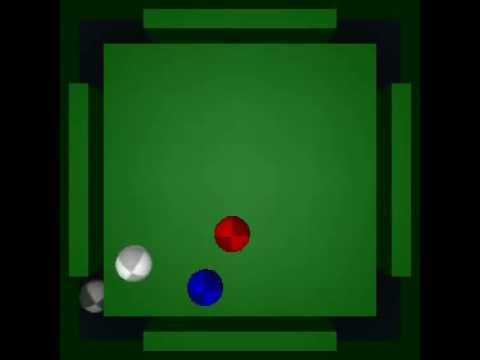

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('BeaLdaN2C3Q')

# 6 RELATED WORK

* Lee et al. (2015) introduced a neural network architecture where classifications branch off interme- diate hidden layers.
* Value iteration networks (Tamar et al., 2016) use convolutional and max-pooling layers to represent a step of value iteration.
* Schmidhuber (2015) dicusses learning abstract models.

# 7 DISCUSSION

* The predictron is a single differentiable architecture that rolls forward an internal model to estimate values. This internal model may be given both the structure and the semantics of traditional rein- forcement learning models. But unlike most approaches to model-based reinforcement learning, the model is fully abstract: <font color="red">it need not correspond to the real environment in any human understandable fashion, so long as its rolled-forward “plans” accurately predict outcomes in the true environment</font>.

* <font color="red">The predictron may be viewed as a novel network architecture that incorporates several separable ideas.</font> 
     - First, the predictron outputs a value by accumulating rewards over a series of internal planning steps. 
     - Second, each forward pass of the predictron outputs values at multiple planning depths.
     - Third, these values may be combined together, also within a single forward pass, to output an overall ensemble value. 
     - Finally, the different values output by the predictron may be encouraged to be self-consistent with each other, to provide an additional signal during learning. 
     - Our experiments demonstrate that these differences result in more accurate predictions of value, in reinforcement learning environments, than more conventional network architectures.

* We have focused on value prediction tasks in uncontrolled environments. 
    - However, <font color="red">these ideas may transfer to the control setting</font>, for example by using the predictron as a Q-network (Mnih et al., 2015). 
    - <font color="red">Even more intriguing is the possibility of learning an internal MDP with abstract internal actions</font>, rather than the MRP model considered in this paper. 
    - We aim to explore these ideas in future work.

# 참고자료 
* [1] (paper) The Predictron: End-To-End Learning and Planning - https://arxiv.org/abs/1612.08810
* [2] (code) zhongwen/predictron - https://github.com/zhongwen/predictron
* [3] Markov reward model - https://en.wikipedia.org/wiki/Markov_reward_model
* [4] Lecture 2: Markov Decision Processes - http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/MDP.pdf
* [5] (video) Predictron network on pool domain - https://youtu.be/BeaLdaN2C3Q